# Analysis on Clinical and Financial Data of Patients with a Certain Condition

#### Matthew Zakharia Hadimaja

Let's start by importing some libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Next, we load the .csv files.

In [2]:
bill_amount = pd.read_csv('bill_amount.csv')
bill_id = pd.read_csv('bill_id.csv')
clinical_data = pd.read_csv('clinical_data.csv')
demographics = pd.read_csv('demographics.csv')

## Data Cleaning

In [3]:
import datetime as dt
from datetime import datetime
from dateutil.parser import parse

### `bill_amount`

In [4]:
bill_amount.head()

,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


In [5]:
bill_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
bill_id    13600 non-null int64
amount     13600 non-null float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


As can be seen, we have no missing data in this table. The data are also stored in appropriate formats.

### `bill_id`

In [6]:
bill_id.head()

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [7]:
bill_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 3 columns):
bill_id              13600 non-null int64
patient_id           13600 non-null object
date_of_admission    13600 non-null object
dtypes: int64(1), object(2)
memory usage: 318.8+ KB


We have no missing data here. However, `date_of_admission` is not formatted correctly. We will convert the column into its appropriate `datetime` format.

In [8]:
bill_id['date_of_admission'] = pd.to_datetime(bill_id['date_of_admission'])

In [9]:
bill_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 3 columns):
bill_id              13600 non-null int64
patient_id           13600 non-null object
date_of_admission    13600 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 318.8+ KB


### `demographics`

In [10]:
demographics.head()

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [11]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
patient_id         3000 non-null object
gender             3000 non-null object
race               3000 non-null object
resident_status    3000 non-null object
date_of_birth      3000 non-null object
dtypes: object(5)
memory usage: 117.3+ KB


No missing data here, but the supposedly categorical variables `gender`, `race`, and `resident_status` are not consistent. We also need to convert `date_of_birth` into `datetime` format.

We start by listing down the unique values in each of the categorical variables.

In [12]:
print(demographics['gender'].unique())
print(demographics['race'].unique())
print(demographics['resident_status'].unique())

['Female' 'f' 'Male' 'm']
['Indian' 'Chinese' 'Malay' 'chinese' 'India' 'Others']
['Singaporean' 'Singapore citizen' 'PR' 'Foreigner']


Then, we replace the redundant values.

In [13]:
clean_demographics = {'gender': {'m': 'Male',
                                 'f': 'Female'},
                      'race': {'chinese': 'Chinese',
                               'India': 'Indian'},
                      'resident_status': {'Singapore citizen': 'Singaporean'}}
demographics.replace(clean_demographics, inplace=True)

We also convert `date_of_birth` into `datetime` format.

In [14]:
demographics['date_of_birth'] = pd.to_datetime(demographics['date_of_birth'])

In [15]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
patient_id         3000 non-null object
gender             3000 non-null object
race               3000 non-null object
resident_status    3000 non-null object
date_of_birth      3000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 117.3+ KB


In [16]:
print(demographics['gender'].unique())
print(demographics['race'].unique())
print(demographics['resident_status'].unique())

['Female' 'Male']
['Indian' 'Chinese' 'Malay' 'Others']
['Singaporean' 'PR' 'Foreigner']


As we can see, the data are in correct format, with the categorical variables grouped accordingly.

### `clinical_data`

In [17]:
clinical_data.head()

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [18]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
id                    3400 non-null object
date_of_admission     3400 non-null object
date_of_discharge     3400 non-null object
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null object
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int64
symptom_1             3400 non-null int64
symptom_2             3400 non-null int64
symptom_3             3400 non-null int64
symptom_4             3400 non-null int64
symptom_5             3400 non-null int64
lab

This table contains clinical information of each patient at each admission. In addition to the patient's id, weight, and height, we have 7 medical history data, 6 pre-op medication data, 5 symptom data, and 3 lab result data. Information on the discharge date is also provided in the table.

In this table, we have 2 variables that have missing data, `medical_history_2` and `medical_history_5`. We can also see that `medical_history_3` is not in the correct format, we will later check it. Also, we need to fix the dates again.

In [19]:
clinical_data['date_of_admission'] = pd.to_datetime(clinical_data['date_of_admission'])
clinical_data['date_of_discharge'] = pd.to_datetime(clinical_data['date_of_discharge'])

As said previously, we will check `medical_history_3`.

In [20]:
clinical_data['medical_history_3'].unique()

array(['0', 'No', '1', 'Yes'], dtype=object)

We need to change the `No` and `Yes` into `0` and `1` respectively. However, note that the existing `0` and `1` are string, not integer. We will also replace them.

In [21]:
clean_clinical = {'medical_history_3': {'0': 0,
                                        'No': 0,
                                        '1': 1,
                                        'Yes': 1}}
clinical_data.replace(clean_clinical, inplace=True)

In [22]:
clinical_data['medical_history_3'].unique()

array([0, 1], dtype=int64)

In [23]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
id                    3400 non-null object
date_of_admission     3400 non-null datetime64[ns]
date_of_discharge     3400 non-null datetime64[ns]
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null int64
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int64
symptom_1             3400 non-null int64
symptom_2             3400 non-null int64
symptom_3             3400 non-null int64
symptom_4             3400 non-null int64
symptom_5             3400 non

The table is cleaned now. Note that `medical_history_3` and `medical_history_5` are in float format because of the missing values. Since we don't know cause and nature of this, we will let them be until further action is needed.

## Table Joining

Before we join the tables, notice that there are 13600 bills and 3400 clinical data. It seems that there is a pattern here. We will take a further look before joining any tables.

In [24]:
print(len(bill_id))
print(len(clinical_data))

13600
3400


We check the number of bills for each patient on each visit.

In [25]:
bill_id.groupby(['patient_id', 'date_of_admission']).count()['bill_id'].unique()

array([4], dtype=int64)

It seems that each patient on each visit received 4 bills. As there is nothing to differentiate the bills other than the amount, we will combine the 4 bill amounts into 1 total bill for each patient on each visit. To do this, we combine `bill_id` and `bill_amount`, then we consolidate the amounts.

In [26]:
df = bill_id.merge(bill_amount,  how='left',  on='bill_id').groupby(['patient_id', 'date_of_admission'])['amount'].sum().reset_index().rename(index=str, columns={"amount": "total_amount"})
df.head()

,patient_id,date_of_admission,total_amount
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.566695
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.497872
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.181635
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.883220
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.869010


Next, we combine the new table above with the other two tables. We join `df` with `clinical_data` on `patient_id` and `date_of_admission`, and we join it with `demographics` using just the `patient_id`.

In [27]:
df = df.merge(clinical_data, 
              how='left', 
              left_on=['patient_id', 'date_of_admission'], 
              right_on=['id', 'date_of_admission']).drop('id',1).merge(demographics,
                                                                       how='left',
                                                                       on='patient_id')
df.head()

,patient_id,date_of_admission,total_amount,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,...,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.566695,2014-04-22,0,0.0,0,0,0.0,0,...,0,13.4,27.9,96.0,66.9,155.0,Female,Chinese,Singaporean,1983-01-16
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.497872,2012-11-20,0,1.0,0,0,0.0,1,...,1,16.7,26.5,109.0,89.1,160.0,Female,Chinese,Singaporean,1943-10-14
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.181635,2013-01-31,0,1.0,0,0,0.0,0,...,1,14.8,25.2,96.0,79.5,172.0,Male,Indian,Singaporean,1972-08-26
3,00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.883220,2014-02-15,1,0.0,0,0,0.0,0,...,0,14.9,28.7,122.0,81.1,160.0,Female,Chinese,Singaporean,1976-07-23
4,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.869010,2012-05-10,0,1.0,0,0,0.0,1,...,1,14.2,27.2,89.0,74.7,173.0,Male,Malay,Foreigner,1942-10-19


Since we have `date_of_discharge` and `date_of_admission`, we can compute some variables that may be useful. The first one is `lenght_of_stay`, which is the number of days the patient was hospitalised. The second one is `age`, which is the age of the patient during hospitalisation.

In [28]:
df['length_of_stay'] = (df['date_of_discharge'] - df['date_of_admission']).dt.days
df['age'] = (df['date_of_admission'] - df['date_of_birth']).astype('timedelta64[Y]').astype('int64')

Afterwards, we set `patient_id` and `date_of_admission` as the indices for our table.

In [29]:
df.set_index(['patient_id', 'date_of_admission'], inplace=True)
df.head()

,,total_amount,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,...,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,length_of_stay,age
patient_id,date_of_admission,,,,,,,,,,,,,,,,,,,,,
00225710a878eff524a1d13be817e8e2,2014-04-10,5190.566695,2014-04-22,0,0.0,0,0,0.0,0,1,0,...,27.9,96.0,66.9,155.0,Female,Chinese,Singaporean,1983-01-16,12,31
0029d90eb654699c18001c17efb0f129,2012-11-07,22601.497872,2012-11-20,0,1.0,0,0,0.0,1,0,0,...,26.5,109.0,89.1,160.0,Female,Chinese,Singaporean,1943-10-14,13,69
0040333abd68527ecb53e1db9073f52e,2013-01-19,17447.181635,2013-01-31,0,1.0,0,0,0.0,0,1,0,...,25.2,96.0,79.5,172.0,Male,Indian,Singaporean,1972-08-26,12,40
00473b58e3dc8ae37b3cb34069705083,2014-02-10,15285.883220,2014-02-15,1,0.0,0,0,0.0,0,0,0,...,28.7,122.0,81.1,160.0,Female,Chinese,Singaporean,1976-07-23,5,37
0078662d1d983dde68ea057c42d5b5cf,2012-04-28,73477.869010,2012-05-10,0,1.0,0,0,0.0,1,0,1,...,27.2,89.0,74.7,173.0,Male,Malay,Foreigner,1942-10-19,12,69


In [30]:
#df.reset_index()[df.reset_index()['patient_id'].duplicated(keep=False)].set_index(['patient_id','date_of_admission']).iloc[:,3:10]

## Exploratory Data Analysis

In this section and the following sections, we will treat `total_amount` as the target variable with the other variables as its predictors. However, we will also explore any interesting pattern between the predictors. We start by taking a look at some properties of our data. 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3400 entries, (00225710a878eff524a1d13be817e8e2, 2014-04-10 00:00:00) to (ffd9644f8daf1d28493a7cd700bb30f4, 2013-06-04 00:00:00)
Data columns (total 31 columns):
total_amount          3400 non-null float64
date_of_discharge     3400 non-null datetime64[ns]
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null int64
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int64
symptom_1             3400 non-null int64
symptom_2             3400 non-null int64
symptom_3             3400 non-null int64
symptom_4        

Excluding the dates, itt seems that we have two types of predictors in our data: numerical variables and categorical variables.

### Numerical Variables

First of all, we take a look at all numerical variables. We compute the correlations between the predictors and show the heatmap of the computed correlation matrix.

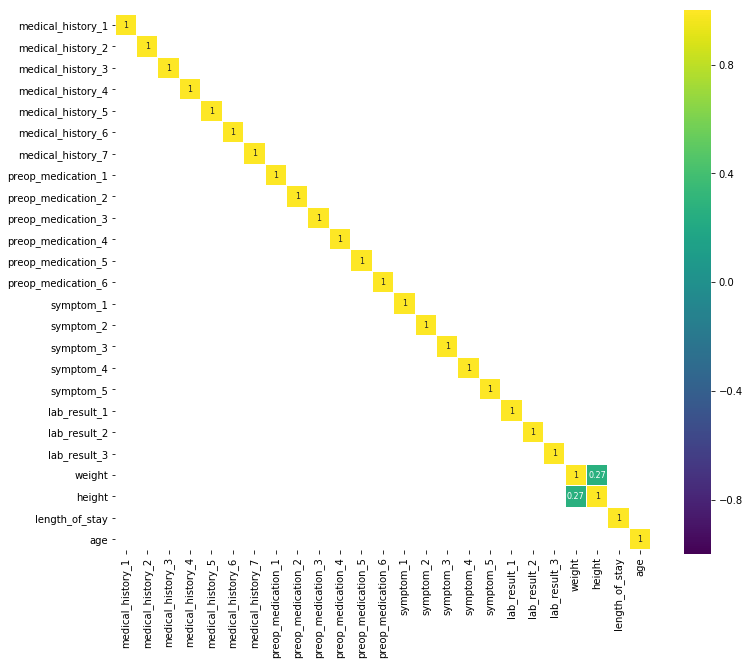

In [32]:
corr = df.drop('total_amount', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.05) | (corr <= -0.05)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

From the matrix above, we can see that the variables are uncorrelated of each other. With the exception of `weight` and `height` that have a correlation coefficient of `0.27`, all other variable pairs have correlation coefficients below `0.05` in absolute value.

Besides looking at the linear relationship between predictors, we also take a look at the linear relationship between `total_amount` and the predictors.

In [33]:
top_corr = df.corr()['total_amount'][1:].abs().sort_values(ascending=False).index
top_corr = df.corr()['total_amount'][1:][top_corr]
top_corr

symptom_5             0.516790
age                   0.325586
medical_history_1     0.226518
symptom_3             0.183988
symptom_2             0.157819
weight                0.157511
medical_history_6     0.141640
symptom_4             0.130236
symptom_1             0.128317
medical_history_7     0.038951
medical_history_5     0.036146
medical_history_2     0.033965
preop_medication_2    0.032263
height                0.026057
preop_medication_6    0.021606
preop_medication_1    0.016112
preop_medication_4    0.015196
medical_history_3     0.011539
medical_history_4    -0.009356
length_of_stay        0.009006
preop_medication_3    0.007839
lab_result_1         -0.006518
lab_result_2         -0.005537
preop_medication_5    0.000453
lab_result_3          0.000092
Name: total_amount, dtype: float64

It looks like we have some variables that are correlated with `total_amount`. Of course, this result follows our intuition that an old and overweight patient with several symptoms or medical histories may need a more advanced procedure and care, thus increasing the bill amount.

Here we will plot `total_amount` against those correlated variables. To save space, we only plot the top 6 variables.

In [34]:
# Q -> Q
features_to_analyse = [i for i in top_corr.index][:6]
features_to_analyse

['symptom_5', 'age', 'medical_history_1', 'symptom_3', 'symptom_2', 'weight']

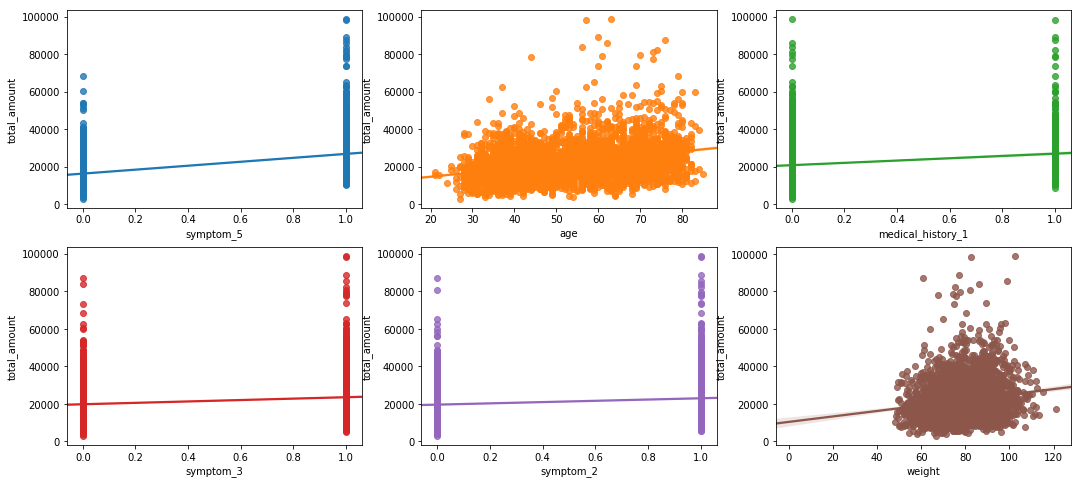

In [35]:
fig, ax = plt.subplots(2, 3, figsize = (18, 8))

for i, ax in enumerate(fig.axes):
    sns.regplot(x=features_to_analyse[i], y='total_amount', data=df, ax=ax)

From the plots above, we can see that `total_amount` increases as the variables increase. We suppose these variables will be important in predicting `total_amount`, but later on we will check them quantitatively using machine learning methods.

We can further separate the numerical variables in our data into two: continuous variables and binary variables. Here we will take a look at each of them.

#### Continuous Variables

First of all, we take a look at how the continuous variables are distributed with histograms.

In [36]:
continuous_variables = ['age', 'height', 'weight', 'lab_result_1', 'lab_result_2', 'lab_result_3', 'length_of_stay']

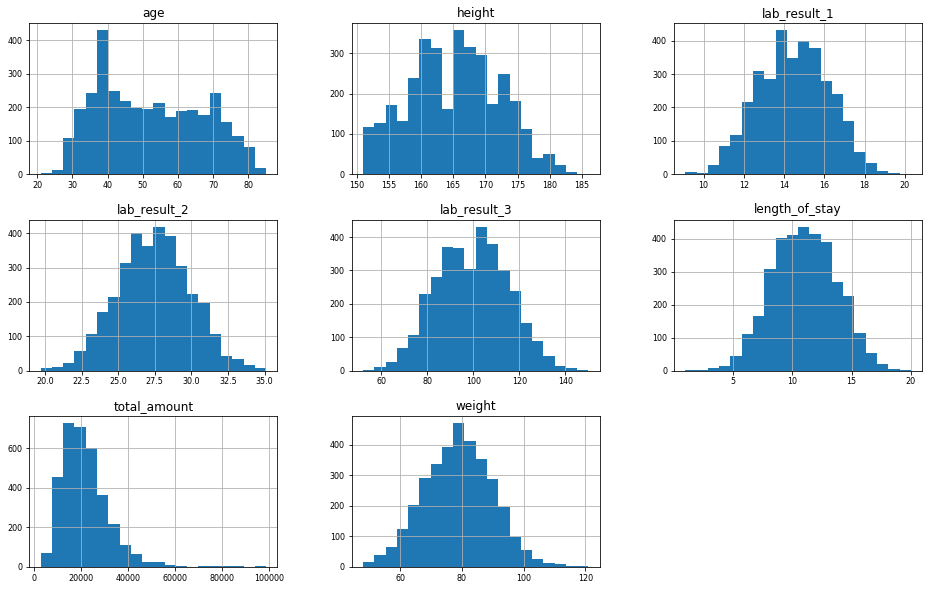

In [37]:
df[continuous_variables+ ['total_amount']].hist(figsize=(16,10), bins=20, xlabelsize=8, ylabelsize=8);

It seems that the most variables are centered and have Gaussian-shaped distributions. However, the distribution of `total_amount` seems to be right-skewed, and `age` with `height` seems to follow bimodal distributions.

#### Binary Variables

As for the binary variables, bar plots would be more appropriate.

In [38]:
binary_variables = list(df)[2:20]

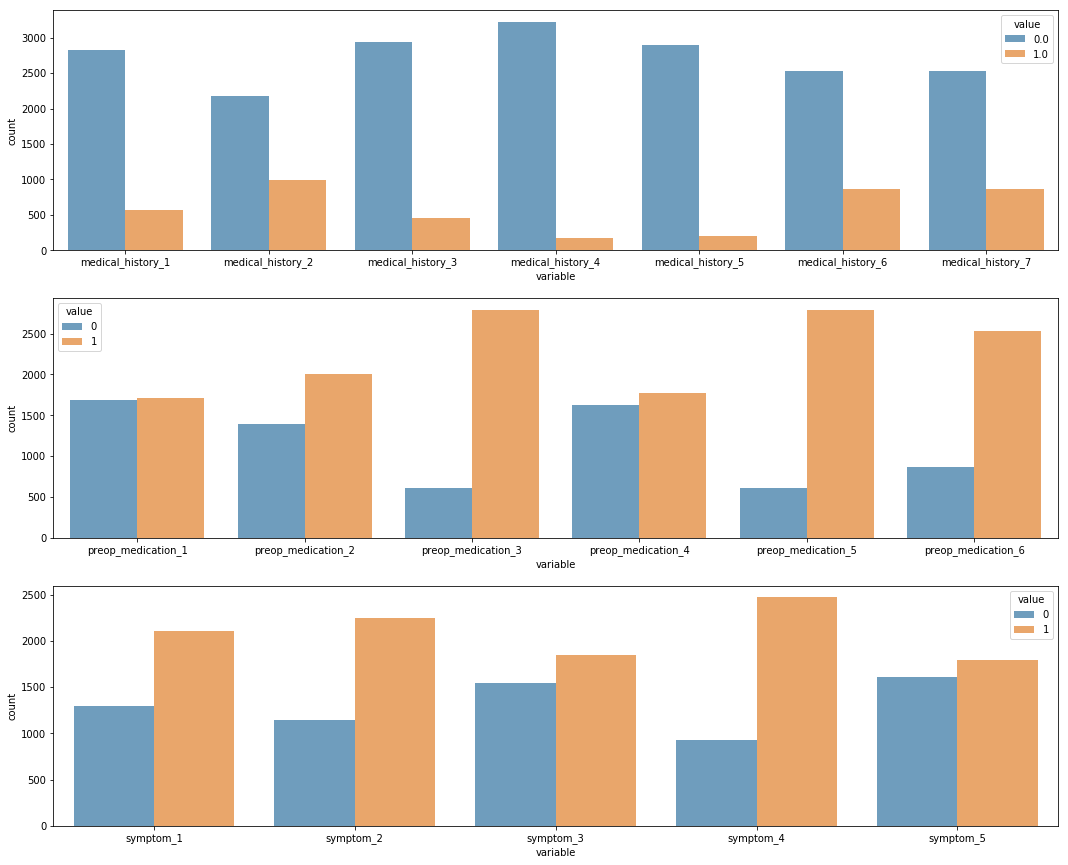

In [39]:
fig, ax = plt.subplots(3,1,figsize = (18, 15))
sns.countplot(x="variable", hue="value", data=pd.melt(df[binary_variables[:7]]), ax=ax[0], alpha=0.7); # medical_history
sns.countplot(x="variable", hue="value", data=pd.melt(df[binary_variables[7:13]]), ax=ax[1], alpha=0.7); # preop_medication
sns.countplot(x="variable", hue="value", data=pd.melt(df[binary_variables[13:]]), ax=ax[2], alpha=0.7); # symptom

As we can see, although some variables are distributed equally, there are some variables that are not proportionate in size. This is expected, though. We wouldn't expect half of the patients to have a certain medical history, would we? However, just to make sure the variances are not near zero, we will compute them.

In [40]:
df[binary_variables].agg([np.mean, np.var]).T

,mean,var
medical_history_1,0.169118,0.140558
medical_history_2,0.311336,0.214473
medical_history_3,0.136176,0.117667
medical_history_4,0.052059,0.049363
medical_history_5,0.063953,0.059883
medical_history_6,0.254706,0.189887
medical_history_7,0.254412,0.189742
preop_medication_1,0.503824,0.250059
preop_medication_2,0.591176,0.241758
preop_medication_3,0.820882,0.147078


Fortunately, even the most unbalanced variable (`medical_history_4`) still has distribution ratio of 1:20. This doesn't necessarily mean problem, but we will just take a note of this.

### Categorical Variables

As for our categorical variables, we use box plots and bar plots to visualize the distribution of `total_amount` across the categories.

In [41]:
categorical_variables = ['gender', 'race', 'resident_status']

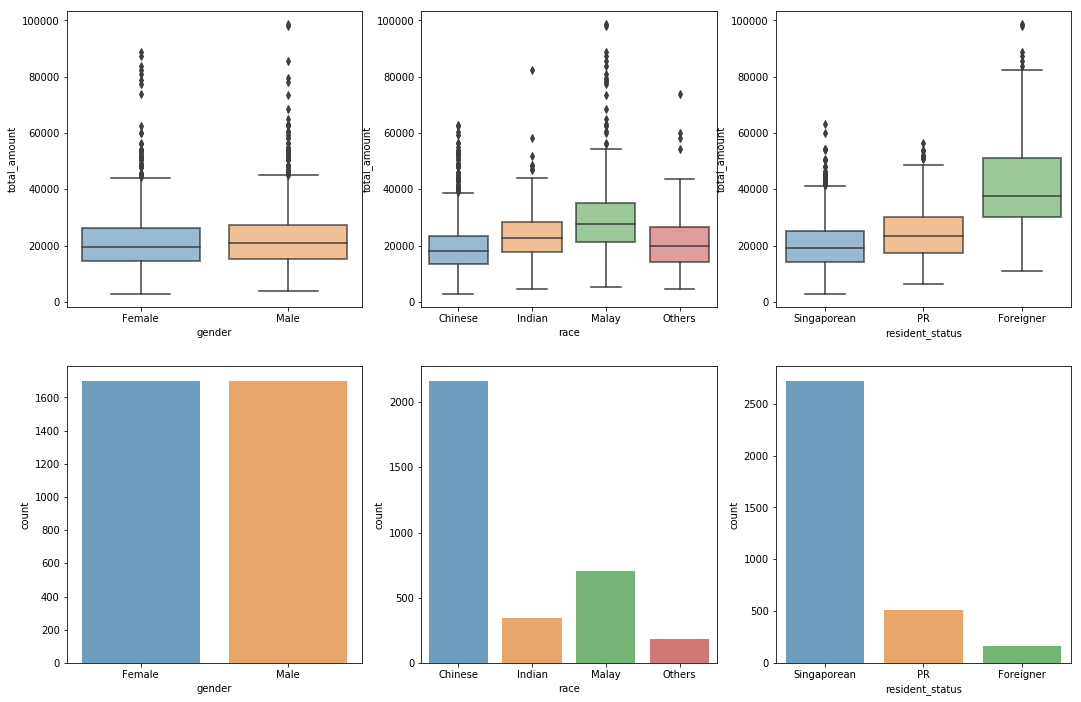

In [42]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
boxplot_order = [['Female', 'Male'],
                 ['Chinese', 'Indian', 'Malay', 'Others'],
                 ['Singaporean', 'PR', 'Foreigner']]

for i, ax in enumerate(fig.axes):
    if i < 3:
        ax = sns.boxplot(x=categorical_variables[i], y='total_amount', data=df, ax=ax, order=boxplot_order[i])
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    else:
        ax = sns.countplot(x=categorical_variables[i-3], alpha=0.7, data=df, ax=ax, order=boxplot_order[i-3])

From the `gender` variable, it seems that there is no visible discrepancies between the amount charged to females and males. It could be the case that this particular condition affects both genders equally. It could also be a sign that patients are not charged differently according to their gender.

As for `race`, it seems that Indian and Malay patients spent more than the others. It could be caused by the medical histories and symptoms that are more prominent in a certain race. Lastly, the `resident_status` of the patient. Obviously, this is a cost-driving factor that affects the cost through the pricing policy according the resident status. Singaporean are charged less than PRs and foreigners.

Lastly, the `resident_status` of the patient. Obviously, this is a cost-driving factor that affects the cost through the pricing policy according the resident status. Singaporean are charged less than PRs and foreigners.

An important thing to note is that most of the patients are Singaporean, with the majority of it are Chinese.

To end our exploratory data analysis, we show the average values of the binary variables across different categorical variables. Just skimming through the table, it seems there are only a few variables that differ across certain categories. For example, the percentage of patient with `medical_history_3` is higher in PR and Singaporean than that in Foreigner. Of course, numerical tests can be performed to verify this.

In [43]:
pd.concat({'Gender': pd.DataFrame.pivot_table(df, values = binary_variables, columns = 'gender'),
           'Race': pd.DataFrame.pivot_table(df, values = binary_variables, columns = 'race'),
           'Resident Status': pd.DataFrame.pivot_table(df, values = binary_variables, columns = 'resident_status')},
          axis=1)

Gender                Race                      \
                      Female      Male   Chinese    Indian     Malay   
medical_history_1   0.175088  0.163133  0.167590  0.156977  0.172560   
medical_history_2   0.316256  0.306431  0.304391  0.336449  0.316514   
medical_history_3   0.133960  0.138398  0.131117  0.139535  0.155587   
medical_history_4   0.056404  0.047703  0.053093  0.066860  0.048091   
medical_history_5   0.071705  0.056202  0.066531  0.053797  0.066770   
medical_history_6   0.235605  0.273852  0.256233  0.258721  0.253182   
medical_history_7   0.271445  0.237338  0.258079  0.267442  0.234795   
preop_medication_1  0.507638  0.500000  0.508772  0.508721  0.486563   
preop_medication_2  0.595770  0.586572  0.578486  0.630814  0.605375   
preop_medication_3  0.815511  0.826266  0.822715  0.840116  0.817539   
preop_medication_4  0.541716  0.504711  0.516159  0.529070  0.548798   
preop_medication_5  0.830787  0.808598  0.823638  0.811047  0.814710   
preop_medication_6  0.739718  0.748528  0.741921  0.741279  0.752475   
symptom_1           0.615746  0.623675  0.620499  0.598837  0.616690   
symptom_2           0.670388  0.654299  0.656510  0.697674  0.660537   
symptom_3           0.528790  0.560660  0.544321  0.584302  0.541726   
symptom_4           0.716804  0.736160  0.725762  0.706395  0.735502   
symptom_5           0.519976  0.533569  0.520776  0.587209  0.519095   

                             Resident Status                        
                      Others       Foreigner        PR Singaporean  
medical_history_1   0.196721        0.180124  0.159223    0.170338  
medical_history_2   0.327273        0.315789  0.290795    0.314939  
medical_history_3   0.114754        0.074534  0.139806    0.139134  
medical_history_4   0.027322        0.037267  0.046602    0.053965  
medical_history_5   0.041916        0.075342  0.078224    0.060557  
medical_history_6   0.234973        0.229814  0.279612    0.251468  
medical_history_7   0.262295        0.298137  0.285437    0.245962  
preop_medication_1  0.502732        0.447205  0.493204    0.509178  
preop_medication_2  0.612022        0.534161  0.578641    0.596916  
preop_medication_3  0.775956        0.869565  0.800000    0.821953  
preop_medication_4  0.497268        0.534161  0.549515    0.517621  
preop_medication_5  0.808743        0.795031  0.834951    0.818282  
preop_medication_6  0.743169        0.788820  0.724272    0.745228  
symptom_1           0.661202        0.577640  0.609709    0.624082  
symptom_2           0.672131        0.695652  0.664078    0.660059  
symptom_3           0.486339        0.490683  0.557282    0.545521  
symptom_4           0.737705        0.708075  0.718447    0.729075  
symptom_5           0.513661        0.546584  0.526214    0.525698

Just looking at it, we can see that some binary variables are more pronounced in a certain gender, race, or resident status (this could be caused by difference in lifestyle, assuming the foreigners and PRs reside in Singapore).

## Machine Learning

In this section, we will try some machine learning methods to predict `total_amount`. We will use the mean squared error (MSE) to measure the performance of our models.

First of all, we create the design matrix. In order to do so, we transform the categorical variables into dummy variables.

In [44]:
X = pd.concat([df[continuous_variables+binary_variables],
           pd.get_dummies(df['gender']).drop('Female', 1), 
           pd.get_dummies(df['race']).drop('Others', 1), 
           pd.get_dummies(df['resident_status']).drop('Foreigner', 1) ], axis=1)

y = df['total_amount']

Then, we scale our data to have mean `0` and variance `1`. As for the binary variables, we don't standardize them to ease the interpretation.

In [45]:
X[continuous_variables] = (X[continuous_variables] - X[continuous_variables].mean()) / X[continuous_variables].std()

To deal with missing data in `medical_history_2` and `medical_history_5`, since we don't know the nature of those missing values, we will fill them with `0`. We expect that the missing values mean so. Besides, the majority of those variables are `0`.

In [46]:
X.fillna(0, inplace=True)

Lastly, we split our data into training data and test data. We will do a 2:1 split and store them into different objects.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

We start with a simple linear regression, or the ordinary least square (OLS). Since this model doesn't need any parameter tuning, we will make this our baseline method.

In [48]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We then take a look at the fitted coefficients.

In [49]:
pd.Series(ols.coef_, index = list(X)).sort_values(ascending=False)

symptom_5             10492.536881
Malay                  8208.713402
medical_history_1      6166.795082
symptom_3              3983.479633
symptom_2              3670.804277
medical_history_6      3497.629477
age                    3129.440722
symptom_4              3087.384790
symptom_1              2756.801696
medical_history_5      1624.066874
weight                 1590.097895
Indian                 1589.934194
medical_history_7      1028.745463
preop_medication_1      574.077724
medical_history_4       434.190073
medical_history_2       430.687939
preop_medication_2      360.444001
preop_medication_5      327.449013
medical_history_3       254.078566
preop_medication_3      251.787988
preop_medication_4       27.726127
lab_result_2             21.208274
preop_medication_6       12.013876
length_of_stay           -1.537716
Male                     -8.331251
lab_result_3            -48.636477
lab_result_1            -52.178155
height                 -278.949102
Chinese             

From the sorted coefficients above, we can infer that if a patient shows `symptom_5`, the patient is expected to be charged around 10000 SGD more. Similarly, if a patient has `medical_history_1`, the patient is expected to be charged around 6000 SGD more. Generally, the symptom variables drive the cost the most, with some medical history variables also affecting the cost in the thousands. On the contrary, some of the medical history variables and all pre-op medications and lab results variables only affect the cost in the hundreds.

Besides the clinical data variables, we can see that some physical variables such as `age` and `weight` have their place in driving `total_amount`. 

An interesting observation comes from the dummy variables from `resident_status`. From the coefficients, we can see that foreigners pay a premium of more than 20000 SGD, twice the impact of `symptom_5`. 

Besides `resident_status`, `race` also plays a significant part in driving the cost. Malays are expected to have higher costs, while Chinese are expected to have lower costs. Perhaps further analysis can be done to see whether there's a difference between the medical conditions of Malay patients and those of Chinese patients. To give a quick illustration, here are the coefficients fitted only from Chinese Singaporean patients.

In [50]:
ols.intercept_

23587.448824204963

In [51]:
chi_sg = (X_train['Singaporean']==1) & (X_train['Chinese']==1)
pd.Series(linear_model.LinearRegression().fit(X_train[chi_sg],
                                              y_train[chi_sg]).coef_, index = list(X)).sort_values(ascending=False)

symptom_5             8356.696313
medical_history_1     4826.488952
symptom_3             3197.598497
symptom_2             2944.616646
medical_history_6     2845.792355
age                   2572.255885
symptom_4             2474.955079
symptom_1             2082.526971
weight                1271.063769
medical_history_5      848.670941
medical_history_7      761.211624
preop_medication_1     467.793345
medical_history_3      288.406603
preop_medication_3     284.495389
preop_medication_5     258.610569
medical_history_2      255.205626
preop_medication_6     199.942166
preop_medication_2     178.460944
medical_history_4      168.989977
Male                    29.785667
lab_result_1            28.099125
PR                       0.000000
Chinese                  0.000000
Indian                   0.000000
Malay                    0.000000
Singaporean              0.000000
length_of_stay          -2.014334
lab_result_3           -12.773178
lab_result_2           -13.761169
preop_medicati

After removing patients that are not Chinese Singaporean, we still have a similar result from the previous one. Of course, this model should work better on Chinese Singaporean patient, since we have removed irrelevant noises from our data. The same approach, however, may not be applicable on other race or resident status. For example, there are only 43 Indian PRs on our data. For this reason, we will stick to the first model.

In [52]:
sum((X['PR']==1) & (X['Indian']==1))

43

Now it's time to test our model. Here we predict `total_amount` of the test data with our model. Then, we compute the MSE.

In [53]:
((ols.predict(X_test) - y_test) ** 2).mean() ** 0.5

2473.7930898002946

Not too bad for a baseline model. To give a better illustration on the residual distribution, we will plot the residuals against the predicted values.

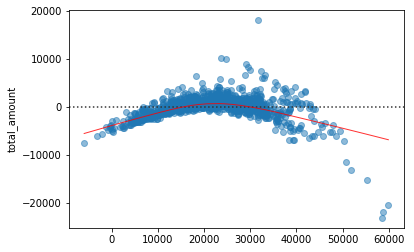

In [54]:
sns.residplot(x=ols.predict(X_test),
              y=ols.predict(X_test) - y_test,
              lowess=True,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

From the plot above, we see that the residuals are close to `0` around 25000, with a decreasing tendency as it deviates from that point. The residual plot also resembles a quadratic function. Perhaps we can try polynomial regression?

### Polynomial Regression

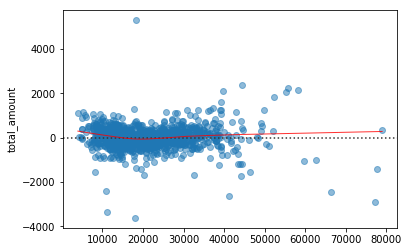

In [55]:
from sklearn.preprocessing import PolynomialFeatures
X_train_quad = PolynomialFeatures(degree=2).fit_transform(X_train)
X_test_quad = PolynomialFeatures(degree=2).fit_transform(X_test)

poly = linear_model.LinearRegression(fit_intercept=False).fit(X_train_quad, y_train)
sns.residplot(x=poly.predict(X_test_quad),
              y=poly.predict(X_test_quad) - y_test,
              lowess=True,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

In [56]:
((poly.predict(X_test_quad) - y_test) ** 2).mean() ** 0.5

520.6333942565653

It seems that adding polynomial features increases the performance dramatically. We have reduced the MSE to a mere 500, a very acceptable error rate, considering the magnitude of `total_amount`. However, by doing so we have increased the number of variables into more than 500!

Here we will see the coefficients.

In [57]:
poly_var = PolynomialFeatures(degree=2).fit(X_train).get_feature_names(X_train.columns)

# the where method is to filter out coefficients with 
# very large magnitude that are not meaningful (they cancel out each other automatically)
pd.Series(poly.coef_, index=poly_var).where(lambda x : abs(x) <= 1e6).dropna().sort_values(ascending=False)

1                                  5639.613742
symptom_5 Malay                    3939.218262
age                                3339.199080
medical_history_1 Malay            2118.057861
weight                             1712.644881
Chinese Singaporean                1674.812866
symptom_3 Malay                    1469.509766
age symptom_5                      1462.501465
symptom_2 Malay                    1445.858887
medical_history_6 Malay            1351.910400
Chinese PR                         1323.869507
symptom_4 Malay                    1164.509766
age Malay                          1134.828209
symptom_1 Malay                    1125.597168
medical_history_4 PR               1116.309006
medical_history_4 Singaporean      1028.158813
preop_medication_6 PR               951.509521
preop_medication_6 Singaporean      882.907227
age medical_history_1               867.558167
symptom_5 Indian                    781.081055
weight symptom_5                    751.161133
weight Malay 

As expected, interactions between the influential variables from the OLS model dominate both end of the coefficients range. Perhaps we can conclude that this model is very strong in predictive power, but weak in simplicity and interpretability. It's far more easier to explain the first model to general public or stakeholders.

### LASSO

To extend our approach with regression model, we also try regularization method with LASSO. Because LASSO can set a coefficient as `0`, this approach can also double as feature selection.

Here we use cross-validation to fine tune the parameter `alpha`.

In [58]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [59]:
from sklearn import linear_model
lassoCV = linear_model.LassoCV()

In [60]:
alpha = lassoCV.fit(X_train, y_train).alpha_
print('Best alpha:',alpha) 

Best alpha: 3.62119261889


It seems that the best `alpha` is small. We may expect the model to still keep many features.

In [61]:
lasso = linear_model.Lasso(alpha=alpha).fit(X_train, y_train)
pd.Series(lasso.coef_, index=list(X)).sort_values(ascending=False)

symptom_5             10479.944277
Malay                  8108.140868
medical_history_1      6137.249266
symptom_3              3967.954046
symptom_2              3654.051362
medical_history_6      3471.640016
age                    3127.416869
symptom_4              3067.034204
symptom_1              2741.664311
weight                 1586.034943
medical_history_5      1564.930888
Indian                 1470.527868
medical_history_7      1010.169387
preop_medication_1      554.504465
medical_history_2       415.760583
medical_history_4       356.835859
preop_medication_2      341.520193
preop_medication_5      306.479294
preop_medication_3      230.891445
medical_history_3       218.631492
lab_result_2             16.092360
preop_medication_4       16.005380
preop_medication_6        0.000000
Male                     -0.000000
length_of_stay           -0.000000
lab_result_3            -44.900955
lab_result_1            -47.852770
height                 -277.414161
Chinese             

As expected, the model only remove 3 variables. Let's take a look at the test error and the residual plot.

In [62]:
((lasso.predict(X_test) - y_test) ** 2).mean() ** 0.5

2466.8972015320073

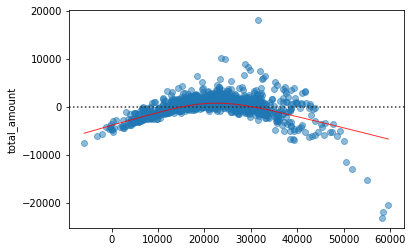

In [63]:
sns.residplot(x=lasso.predict(X_test),
              y=lasso.predict(X_test) - y_test,
              lowess=True,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

Unfortunately, it's only a slight improvement from the OLS. It's expected since the optimal `alpha` itself is small. The residual plot itself looks very similar to that of the OLS. From this result, we can say that the more sparse model from larger `alpha` will not produce better result, thus it's better to keep most of the variables and apply only a bit of regularization penalty.

### Regression Tree

Besides least square methods, tree methods can also be used. One strong reason to use tree method is the interpretability. Here we will try the regression tree method on our data and see its performance.

For this method, we will use cross-validation to find the optimal depth limit of the tree.

In [64]:
from sklearn import tree

param_candidates = [
  {'max_depth': [1, 2, 4, 6, 8, 10]},
]
regtCV = GridSearchCV(estimator=tree.DecisionTreeRegressor(), param_grid = param_candidates).fit(X_train, y_train)

In [65]:
print('Best max_depth:',regtCV.best_estimator_.max_depth) 

Best max_depth: 8


It seems that the data favour a deep tree. In terms of interpretability, this kind of tree may fare badly. Let's see the numerical performance, though.

In [66]:
regt = regtCV.best_estimator_.fit(X_train, y_train)

In [67]:
((regt.predict(X_test) - y_test) ** 2).mean() ** 0.5

4763.274857853647

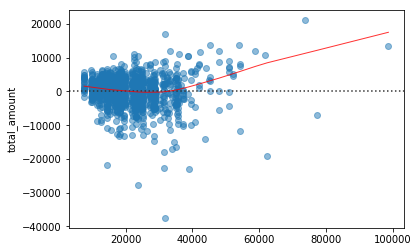

In [68]:
sns.residplot(x=regt.predict(X_test),
              y=regt.predict(X_test) - y_test,
              lowess=True,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

It seems that the tree model is not suitable for our data. We will just try other methods.

### Support Vector Regression

Here we will try the support vector method to fit our data.

Similar to the tree method above, we will also use cross-validation to tune the parameters and choose the kernel.

In [69]:
from sklearn import svm

param_candidates = [
  {'C': [1, 10, 100, 10000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 10000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
]
svrCV = GridSearchCV(estimator=svm.SVR(), param_grid = param_candidates).fit(X_train, y_train)

In [70]:
print('Best C:',svrCV.best_estimator_.C) 
print('Best Kernel:',svrCV.best_estimator_.kernel)
print('Best Gamma:',svrCV.best_estimator_.gamma)

Best C: 10000
Best Kernel: linear
Best Gamma: auto


It seems that linear kernel is better for our application. We will see the numerical performance.

In [71]:
svr = svrCV.best_estimator_.fit(X_train, y_train)

In [72]:
((svr.predict(X_test) - y_test) ** 2).mean() ** 0.5

2555.0644324467503

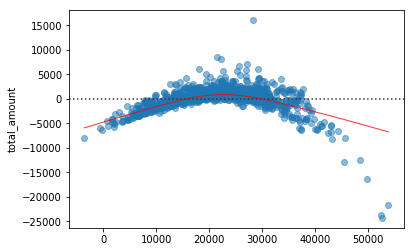

In [73]:
sns.residplot(x=svrCV.predict(X_test),
              y=svrCV.predict(X_test) - y_test,
              lowess=True,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

Apparently, support vector regression is not better than OLS in our application.

### Neural Network

The last method we will try is the neural network. Neural network is known as a very powerful black box.

Here we will just try a simple neural network with up to two hidden layers. To select the number of nodes in the hidden layers, we use cross-validation to try several values.

In [74]:
from sklearn.neural_network import MLPRegressor

In [75]:
param_candidates = [
  {'hidden_layer_sizes': [(2), (5), (7), (10), (10,2), (10,5), (10,10)]},
]
nnetCV = GridSearchCV(estimator=MLPRegressor(solver='lbfgs', activation='relu'), param_grid = param_candidates).fit(X_train, y_train)

In [76]:
nnetCV.best_estimator_.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [77]:
((nnetCV.predict(X_test) - y_test) ** 2).mean() ** 0.5

1047.9571265216175

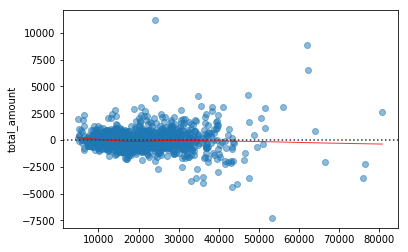

In [78]:
sns.residplot(x=nnetCV.predict(X_test),
              y=nnetCV.predict(X_test) - y_test,
              lowess=True,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

It seems that this model performs quite well. Although the polynomial regression is better, this model provides significant improvement over the OLS. Perhaps more exploration can be done to further fine tune the model.

## Conclusion

In this analysis, we analysed clinical and financial data of patients with a certain condition. The goal is to predict the cost charged to a patient using the patient's clinical data. Before the analysis, we cleaned the data to make our analysis easier. Then, we did some exploratory data analysis to get a better look at our data. Furthermore, we tried several machine learning methods to predict the cost.

From our analysis, we see that the symptom variables and the demographic variables (for example, race and resident status) affect the cost more. On the other hand, a majority of the medical history variables, all pre-op medications, and all lab results variables don't seem to contribute much in determining the cost. These patterns can be seen in both our exploratory data analysis part and the statistical modeling part.

We also found that simple model with heavily regularised parameters are not suitable for our data. In our analysis, complicated methods with many parameters such as polynomial regression and neural network perform the best, while simple methods don't.

To close our analysis, we hope that this analysis may be of value to parties from various background, be it someone who wants to estimate his/her expected hospitalisation cost, an insurance company who wants to compute premiums for their prospective clients, or a digital health company, focused on solving complex problems in healthcare.